### Hidden Markov Models

**OBJECTIVES**

- Introduce Markov Models
- Introduce Hidden Markov Models
- Use HMM's to investigate time series data
- Use HMM's to classify speech



### Markov Models
<center>
<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/440px-Markovkate_01.svg.png />
</center>



### Hidden Markov Models

<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/HiddenMarkovModel.svg/600px-HiddenMarkovModel.svg.png />
</center>

In [1]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
import pandas_datareader as pdr

In [3]:
!pip install pandas_datareader
!pip install lxml

     ------------------------------------ 109.5/109.5 kB 353.1 kB/s eta 0:00:00


In [6]:
#get some stock data
btc = pdr.get_data_yahoo('BTC-USD')

In [7]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-02,11320.200195,10905.099609,10978.299805,11074.599609,5138500096,11074.599609
2017-12-03,11858.700195,10862.000000,11082.700195,11323.200195,6608309760,11323.200195
2017-12-04,11657.200195,11081.799805,11315.400391,11657.200195,6132409856,11657.200195
2017-12-05,12032.000000,11604.599609,11685.700195,11916.700195,6895260160,11916.700195
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000


<AxesSubplot:xlabel='Date'>

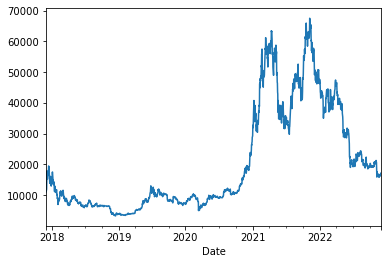

In [8]:
#plot it
btc['Adj Close'].plot()

### HMMLearn

We will use the `hmmlearn` library to implement our hidden markov model.  Here, we use the `GaussianHMM` class.  Depending on the nature of your data you may be interested in a different probability distribution, we will see more here in *Bayes's Week*!

- **HMM Learn**: [here](https://hmmlearn.readthedocs.io/en/latest/tutorial.html)

In [9]:
!pip install hmmlearn

  Using cached hmmlearn-0.2.8-cp39-cp39-win_amd64.whl (110 kB)


In [10]:
from hmmlearn import hmm

In [11]:
#instantiate 
model = hmm.GaussianHMM(n_components=2)

In [13]:
#fit
model.fit(btc[['Adj Close']])

GaussianHMM(n_components=2)

In [15]:
model

GaussianHMM(n_components=2)

In [16]:
model.predict(btc[['Adj Close']])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
preds = model.predict(btc[['Adj Close']])

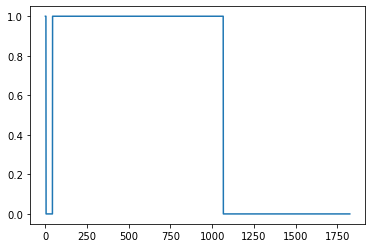

In [18]:
#predict
plt.plot(preds)

In [19]:
#look at our predictions
X = btc[['Adj Close']]

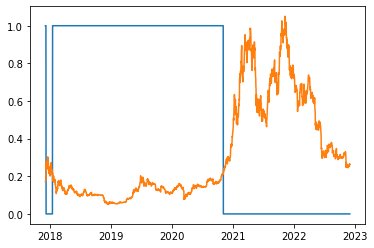

In [20]:
# #plot against stock data
plt.plot(X.index, model.predict(X))
plt.plot(X/(X.max() - X.min()))

In [24]:
#modularize our efforts
def make_regimes(n, X):
    model = hmm.GaussianHMM(n_components=n)
    model.fit(X)
    plt.plot(X.index, model.predict(X))
    plt.plot((X/(X.max() - X.min())))

In [25]:
#test it out on some tickers
tsla = pdr.get_data_yahoo('TSLA')
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,20.551332,20.040667,20.433332,20.346666,87526500.0,20.346666
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


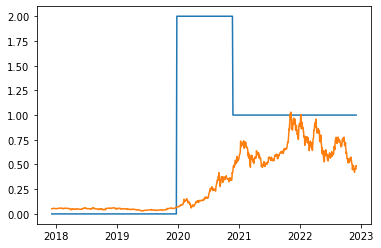

In [26]:
X = tsla[['Adj Close']]
make_regimes(3, X)

In [27]:
btc['regime'] = model.predict(btc[['Adj Close']])

In [28]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close,regime
Date,,,,,,,
2017-12-02,11320.200195,10905.099609,10978.299805,11074.599609,5138500096,11074.599609,1
2017-12-03,11858.700195,10862.000000,11082.700195,11323.200195,6608309760,11323.200195,1
2017-12-04,11657.200195,11081.799805,11315.400391,11657.200195,6132409856,11657.200195,1
2017-12-05,12032.000000,11604.599609,11685.700195,11916.700195,6895260160,11916.700195,1
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0


### Looking at Speech Files

For a deeper dive into HMM's for speech recognition please see Rabner's article A tutorial on hidden Markov models and selected applications in speech recognition [here](https://web.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf).

In [30]:
from scipy.io import wavfile

In [34]:
!ls sounds/apple

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
#read in the data and structure
rate, apple_audio = wavfile.read('sounds/apple/apple01.wav')

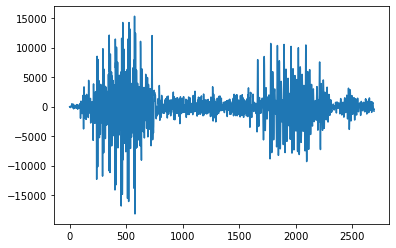

In [38]:
#plot the sound
plt.plot(apple_audio)

In [39]:
#look at another sample
rat, kiwi_sample = wavfile.read('sounds/kiwi/kiwi01.wav')

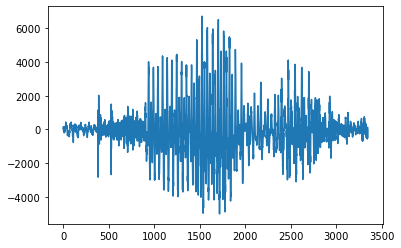

In [40]:
#kiwi's perhaps
plt.plot(kiwi_sample)

In [41]:
from IPython.display import Audio

In [42]:
#take a listen to an apple
Audio('sounds/banana/banana02.wav')

### Generating Features from Audio: Mel Frequency Cepstral Coefficient

Big idea here is to extract the important elements that allow us to identify speech.  For more info on the MFCC, see [here](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/).

In [43]:
!pip install python_speech_features

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=8cf9e84beea910013e379315f7d2957c760f064d7e5734f55bed5d2bc8b5703a
  Stored in directory: c:\users\sparrow\appdata\local\pip\cache\wheels\09\a1\04\08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python_speech_features


In [45]:
import python_speech_features as features

#extract the mfcc features
mfcc_features = features.mfcc(kiwi_sample)


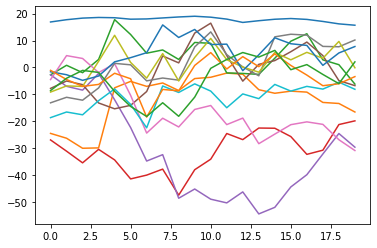

In [46]:
#plot them
plt.plot(mfcc_features);


In [47]:
#determine our x and y
X = mfcc_features
y = ['kiwi']

In [48]:
import os

In [52]:
#make a custom markov class to return scores
class MakeMarkov:
    def __init__(self, n_components = 3):
        self.n_components = n_components
        self.model = hmm.GaussianHMM(n_components=n_components)
        
    def train(self, X):
        self.fit_model = self.model.fit(X)
        return self.fit_model
    
    def score(self, X):
        return self.fit_model.score(X)
        
        
    

In [53]:
# test out on kiwi
model = MakeMarkov()
model.train(X)
print(model.score(X))

C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


-726.8887743649701


In [54]:
mfcc_apple = features.mfcc(apple_audio)
model.score(mfcc_apple)

-2633.3215482028295

### Problem: Applying to all our sounds

To recognize a specific sound, you are to train Markov Models on each of the sound files in the sound folder.  When presented a new sound, you will assign the label based on the highest score from all these models.  Below, train a collection of Markov models and keep track of the trained models with the list `hmm_models`.  Then, see how the models predict for the four sounds we left out of the training given as `in_files` below.

In [55]:
import os

In [79]:
os.listdir('sounds')

['apple', 'banana', 'kiwi', 'lime', 'orange', 'peach', 'pineapple']

In [92]:
#this code works through our files in the sound
#directory and extracts the label, builds a model
#tracks the scores
import numpy as np
hmm_models = []
labels = []

for fruit in os.listdir('sounds'):
    count = 0
    for wavs in os.listdir(f'sounds/{fruit}'):
        print(wavs)
       
        rate, audio = wavfile.read(f'sounds/{fruit}/{wavs}')
        mfcc_features = features.mfcc(audio)
        X= mfcc_features
        y= [fruit]
        count += 1

        model = MakeMarkov()
        model.train(X)
        
        
        print('Model Score of',{fruit}, {count}, model.score(X))
    

apple01.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {1} -564.5673594839704
apple02.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {2} -704.3136296089465
apple03.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {3} -681.7407954065095
apple04.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {4} -748.2138918727329
apple05.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {5} -742.791976790079
apple06.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {6} -641.9390830289752
apple07.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {7} -760.533717256029
apple08.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {8} -893.9515387953843
apple09.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {9} -808.1802183556507
apple10.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {10} -730.1904756597452
apple11.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {11} -792.0115666650507
apple12.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {12} -732.3221153214498
apple13.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {13} -778.5372450200883
apple14.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {14} -789.6936408782999
apple15.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'apple'} {15} -780.954047268316
banana01.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {1} -699.5872681379914
banana02.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {2} -784.2691810490054
banana03.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {3} -856.7036890149219
banana04.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {4} -833.9423378336835
banana05.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {5} -1006.822791928123
banana06.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {6} -998.8374042163625
banana07.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {7} -1073.1254268047546
banana08.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {8} -945.1909442516608
banana09.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {9} -841.6516166042616
banana10.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {10} -1010.8482437028792
banana11.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {11} -940.3590651953357
banana12.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {12} -917.556946555428
banana13.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {13} -1069.0436479162993
banana14.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {14} -1115.2567434673695
banana15.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'banana'} {15} -1007.4456518650711
kiwi01.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {1} -726.9701247149934
kiwi02.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {2} -684.374954125137
kiwi03.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {3} -684.9355832134194
kiwi04.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {4} -661.3088796163128
kiwi05.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {5} -709.6105246873956
kiwi06.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {6} -767.1479271127636
kiwi07.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {7} -859.1432772525599
kiwi08.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {8} -753.4222648328963
kiwi09.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {9} -748.0840769007094
kiwi10.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {10} -747.3672269421705
kiwi11.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {11} -770.6312501220359
kiwi12.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {12} -853.7580667906274
kiwi13.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {13} -873.338011796167
kiwi14.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {14} -859.7210745001316
kiwi15.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'kiwi'} {15} -870.4018418392367
lime01.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {1} -914.4384017983264
lime02.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {2} -839.5432709382636
lime03.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {3} -935.6199614933446
lime04.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {4} -885.1494007144461
lime05.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {5} -944.8173328859298
lime06.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {6} -842.0817502378877
lime07.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {7} -801.961950031117
lime08.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {8} -737.2578063891148
lime09.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {9} -857.3320449683036
lime10.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {10} -767.2134107023999
lime11.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {11} -872.7097340832601
lime12.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {12} -876.1695670801532
lime13.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {13} -694.9881444373364
lime14.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {14} -839.4053769644124
lime15.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'lime'} {15} -783.2443368366474
orange01.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {1} -1525.1357846970964
orange02.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {2} -1489.5957120550447
orange03.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {3} -1374.3498365580158
orange04.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {4} -1466.3340660072697
orange05.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {5} -1601.144760649447
orange06.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {6} -1495.6589989712681
orange07.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {7} -1684.0519336425607
orange08.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {8} -1422.6609675878055
orange09.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {9} -1530.5902528355655
orange10.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {10} -1692.0670730068023
orange11.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {11} -1820.872196097008
orange12.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {12} -1769.0112619112545
orange13.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {13} -1481.900422070304
orange14.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {14} -1568.2686066135195
orange15.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'orange'} {15} -1625.937338012
peach01.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {1} -1167.2962612486238
peach02.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {2} -1277.7821475721062
peach03.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {3} -1221.4582875059155
peach04.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {4} -1313.869875636228
peach05.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {5} -1300.112339559154
peach06.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {6} -1267.214322610703
peach07.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {7} -1149.1225115651926
peach08.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {8} -1341.4087644880885
peach09.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {9} -1240.485079868821
peach10.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {10} -1177.8314147819374
peach11.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {11} -1314.2336548998865
peach12.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {12} -1362.858674130254
peach13.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {13} -1315.6186989248974
peach14.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {14} -1244.822775396669
peach15.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'peach'} {15} -1418.9590708325834
pineapple01.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {1} -1159.9138816737614
pineapple02.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {2} -1129.8420961098745
pineapple03.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {3} -1178.557055066061
pineapple04.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {4} -1210.1451388601906
pineapple05.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {5} -1045.9909131368179
pineapple06.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {6} -1202.83945159461
pineapple07.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {7} -1160.5695030494098
pineapple08.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {8} -1126.39790295377
pineapple09.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {9} -1138.036976808933
pineapple10.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {10} -1150.604611247159
pineapple11.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {11} -1096.9489765493217
pineapple12.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {12} -1277.1653154504259
pineapple13.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {13} -1349.9302818541444
pineapple14.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {14} -1270.6682059063605
pineapple15.wav


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Score of {'pineapple'} {15} -1154.2467639356028


In [93]:
# Class Solution
import numpy as np
hmm_models = []
labels = []
#looping over files in sounds folder
for file in os.listdir('sounds'):
    #listing the soundfiles with full paths
    sounds = os.listdir(f'sounds/{file}')
    #loop over the individual sounds, read in, model
    for sound in sounds[:-1]:
        #read in the file
#         print(sound)
        rate, audio = wavfile.read(f'sounds/{file}/{sound}')
        #extract mfcc
        X = features.mfcc(audio)
        #build a model
        model = MakeMarkov()
        model.train(X)
        #tack model on hmm_models
        hmm_models.append(model)
        #label for sound on `labels`
        labels.append(file)

C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak o

In [ ]:
#write a loop that bops over the files and prints the label based on
#highest score



### Making Predictions

Now that we have our models, given a new sound we want to score these based on what we've learned and select the most likely example.

In [95]:
in_files = ['sounds/pineapple/pineapple15.wav',
           'sounds/orange/orange15.wav',
           'sounds/apple/apple15.wav',
           'sounds/kiwi/kiwi15.wav']

In [98]:
rate, audio = wavfile.read(in_files[0])
X = features.mfcc(audio)
scores = []
for model in hmm_models:
    scores.append(model.score(X))

In [99]:
scores.index(max(scores))

96

In [100]:
labels[scores.index(max(scores))]

'pineapple'

### Further Reading

- **Textbook**: Marsland's *Machine Learning: An Algorithmic Perspective* has a great overview of HMM's.
- **Time Series Examples**: Checkout Aileen Nielsen's tutorial from [SciPy 2019](https://www.youtube.com/watch?v=v5ijNXvlC5A) and her book *Practical Time Series Analysis*
- **Speech Recognition**: Rabiner's [*A tutorial on hidden Markov models and selected applications in speech recognition*]('readings/rabiner.pdf')
- **HMM;s and Dynamic Programming**: Avik Das' PyData Talk [*Dynamic Programming for Machine Learning: Hidden Markov Models*](https://www.youtube.com/watch?v=MADX-L75ub8)



<center>
 <img src = 'readings/bhmm.png'  />
<center>
    
    
